# Noções básicas de Ordenação

Eduardo Furlan Miranda

2024-02-01

SCHEFFER, V. C. Algoritmos de Ordenação. <https://cm-kls-content.s3.amazonaws.com/202002/INTERATIVAS_2_0/LINGUAGEM_DE_PROGRAMACAO/LIVRO_DIGITAL/npf_u2s3.html>

- Selection Sort
- Heap Sort (<https://www.geeksforgeeks.org/heap-sort/>)
- Bubble Sort
- Insertion Sort
- Merge Sort
- Quick Sort

## Selection Sort (Ordenação por Seleção)

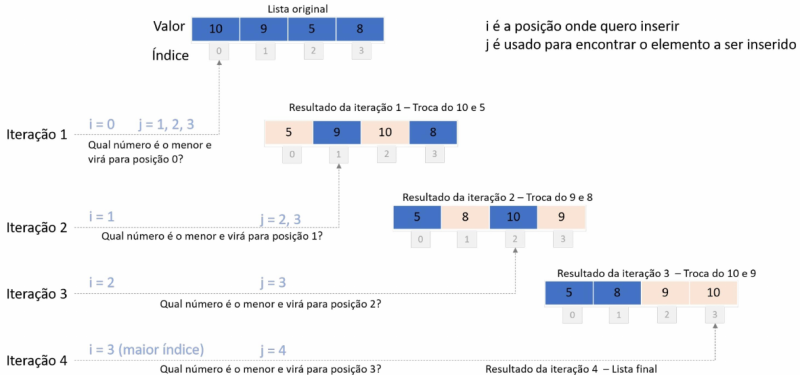

Função que implementa a ordenação por seleção:

In [4]:
def SelectionSort(lista):
    N = len(lista)
    for i in range(N):

        # Aponta para o primeiro elemento na iteração.
        index_menor = i

        # Procura do elemento seguinte até o último.
        for j in range(i + 1, N):
            if lista[j] < lista[index_menor]:
                index_menor = j

        # Troca o primeiro elemento com o número encontrado
        tmp = lista[i]
        lista[i] = lista[index_menor]
        lista[index_menor] = tmp

    print(lista)

Chamada principal, para ordenar uma lista:

In [5]:
SelectionSort([10, 9, 5, 8, 11, -1, 3])

[-1, 3, 5, 8, 9, 10, 11]


---

## Heap Sort (Ordenação de Amontoar)

https://www.geeksforgeeks.org/heap-sort/

- Similar ao Selection Sort.
- Usa uma estrutura de dados chamada Heap.
- Heap é uma estrutura baseada em árvore, parcialmente ordenada.
- Em uma max-heap o nó pai deve sempre ser maior ou igual aos nós filhos.
- Uma implementação comum é árvore binária.

<figure id="fig:abin">
    
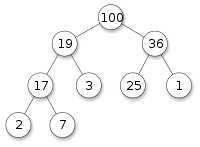

<figcaption style="font-size:.9em;">
Exemplo de uma árvore binária.
</figcaption>
</figure>

## Exemplo usando a lista [4, 10, 3, 5, 1]

Primeiro transforma em max-heap:

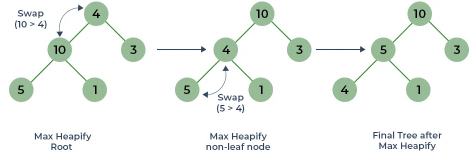

Próximo passo, "elimina" o 10 e repete (ou coloca o 10 na última posição do array pois já está ordenado, não mexe mais nele e ordena os demais):

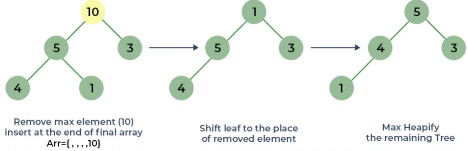

Faz a mesma coisa com o 5:

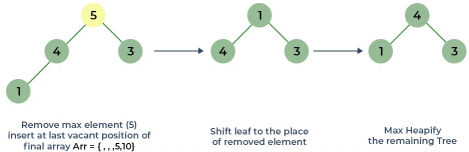

E vai repetindo até ordenar.

### Implementação

Função para converter um *array* em uma estrutura de dados *heap*:

In [7]:
def heapify(Comprimento, Elemento):
    N = Comprimento
    i = Elemento
    global R
    largest = i  # Inicialize o maior como raiz
    l = 2 * i + 1  # esquerda
    r = 2 * i + 2  # direita

    # Veja se o filho esquerdo da raiz existe e é maior que a raiz
    if l < N and arr[largest] < arr[l]:
        largest = l

    # Ver se o filho certo da raiz existe e é maior que a raiz
    if r < N and arr[largest] < arr[r]:
        largest = r

    print(" " * 2 * R, 
        f"Esquerda={l}, direita={r}, largest={largest}, Elemento={i}")

    # Altera a raiz, se necessário
    if largest != i:
        print(" " * 2 * R, arr, end=" → ")
        arr[i], arr[largest] = arr[largest], arr[i]  # troca
        print(arr)
        print(" " * 2 * R, f"Chamada recursiva nível {R}:")
        R += 1
        heapify(Comprimento=N, Elemento=largest)  # Heapify a raiz
        R -= 1
    else:
        print(" " * 2 * R, arr, f"(largest=Elemento={i}, não faz nada)")

Rotina principal que chama a função heapify:

In [8]:
arr = [4, 10, 3, 5, 1]
N = len(arr)
R = 0
for i in range(N // 2 - 1, -1, -1):
    print(f"Chamada de heapify com i = {i}:")
    heapify(Comprimento=N, Elemento=i)

Chamada de heapify com i = 1:
 Esquerda=3, direita=4, largest=1, Elemento=1
 [4, 10, 3, 5, 1] (largest=Elemento=1, não faz nada)
Chamada de heapify com i = 0:
 Esquerda=1, direita=2, largest=1, Elemento=0
 [4, 10, 3, 5, 1] → [10, 4, 3, 5, 1]
 Chamada recursiva nível 0:
   Esquerda=3, direita=4, largest=3, Elemento=1
   [10, 4, 3, 5, 1] → [10, 5, 3, 4, 1]
   Chamada recursiva nível 1:
     Esquerda=7, direita=8, largest=3, Elemento=3
     [10, 5, 3, 4, 1] (largest=Elemento=3, não faz nada)


Próximo passo

- Vai extraindo os nós raiz e ordenando.
- O nó raiz do passo anterior possui o maior valor, e está no elemento de array de índice [0].
- Ele é trocado com o último elemento do array.
- O comprimento do array, passado para heapify, é reduzido em um, "eliminando" o último elemento do array.

In [9]:
# usa o mesmo array do passo anterior
R = 1
for i in range(N - 1, 0, -1):
    print(f"Troca o nó raiz [0] com o elemento de índice [{i}]")
    print(arr, end=" → ")
    arr[i], arr[0] = arr[0], arr[i]  # troca
    print(arr)
    print(f"Chamada de heapify com comprimento = {i}")
    heapify(Comprimento=i, Elemento=0)

Troca o nó raiz [0] com o elemento de índice [4]
[10, 5, 3, 4, 1] → [1, 5, 3, 4, 10]
Chamada de heapify com comprimento = 4
   Esquerda=1, direita=2, largest=1, Elemento=0
   [1, 5, 3, 4, 10] → [5, 1, 3, 4, 10]
   Chamada recursiva nível 1:
     Esquerda=3, direita=4, largest=3, Elemento=1
     [5, 1, 3, 4, 10] → [5, 4, 3, 1, 10]
     Chamada recursiva nível 2:
       Esquerda=7, direita=8, largest=3, Elemento=3
       [5, 4, 3, 1, 10] (largest=Elemento=3, não faz nada)
Troca o nó raiz [0] com o elemento de índice [3]
[5, 4, 3, 1, 10] → [1, 4, 3, 5, 10]
Chamada de heapify com comprimento = 3
   Esquerda=1, direita=2, largest=1, Elemento=0
   [1, 4, 3, 5, 10] → [4, 1, 3, 5, 10]
   Chamada recursiva nível 1:
     Esquerda=3, direita=4, largest=1, Elemento=1
     [4, 1, 3, 5, 10] (largest=Elemento=1, não faz nada)
Troca o nó raiz [0] com o elemento de índice [2]
[4, 1, 3, 5, 10] → [3, 1, 4, 5, 10]
Chamada de heapify com comprimento = 2
   Esquerda=1, direita=2, largest=0, Elemento=0
   [3

---

## Bubble Sort (Ordenação de Bolha)

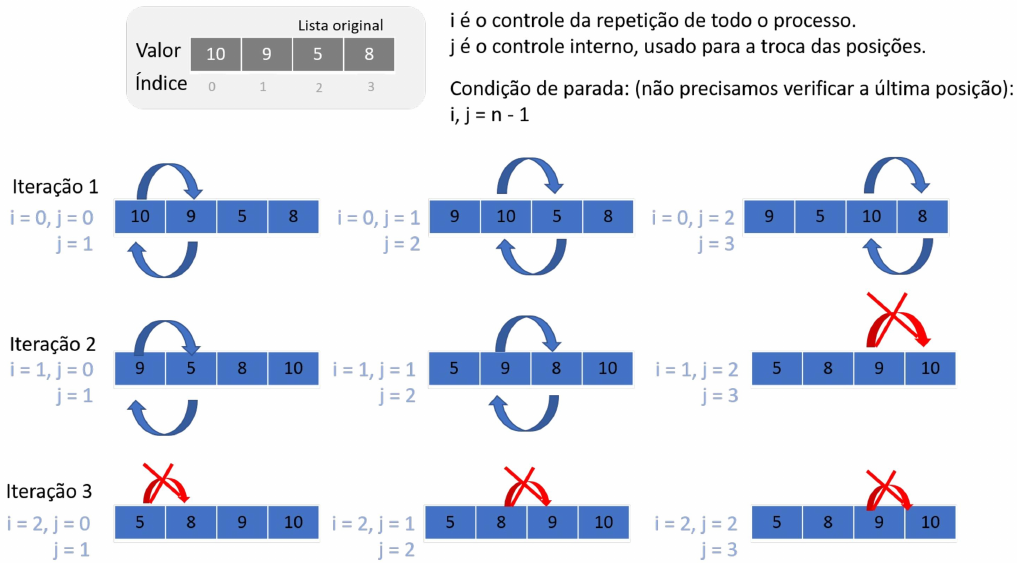

In [ ]:
lista = [10, 9, 5, 8, 11, -1, 3]
n = len(lista)

for i in range(n-1):
        for j in range(n-1):
                if lista[j] > lista[j+1]:
                                lista[j], lista[j+1] = lista[j+1], lista[j]


lista

[-1, 3, 5, 8, 9, 10, 11]

---

## Insertion Sort (Ordenação de Inserção)

[10, 9, 5, 8]

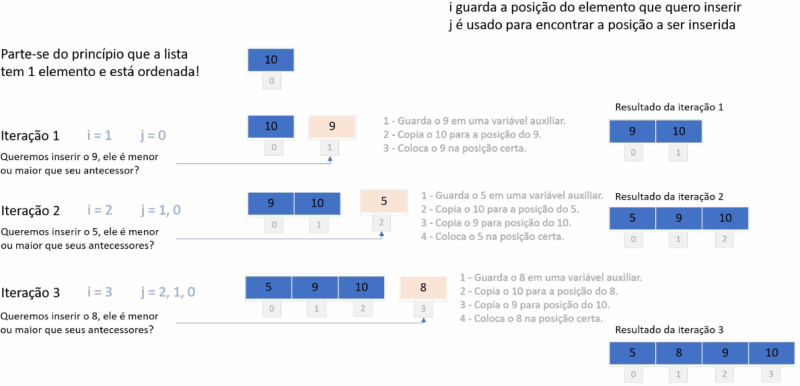

In [ ]:
lista = [10, 9, 5, 8, 11, -1, 3]
n = len(lista)

for i in range(1, n):
    inserir = lista[i]
    j = i - 1

    while (lista[j] > inserir) and (j >= 0):
        lista[j + 1] = lista[j]
        j -= 1

    lista[j + 1] = inserir


lista

[-1, 3, 5, 8, 9, 10, 11]

---

## Merge Sort (Ordenação por Mesclagem)

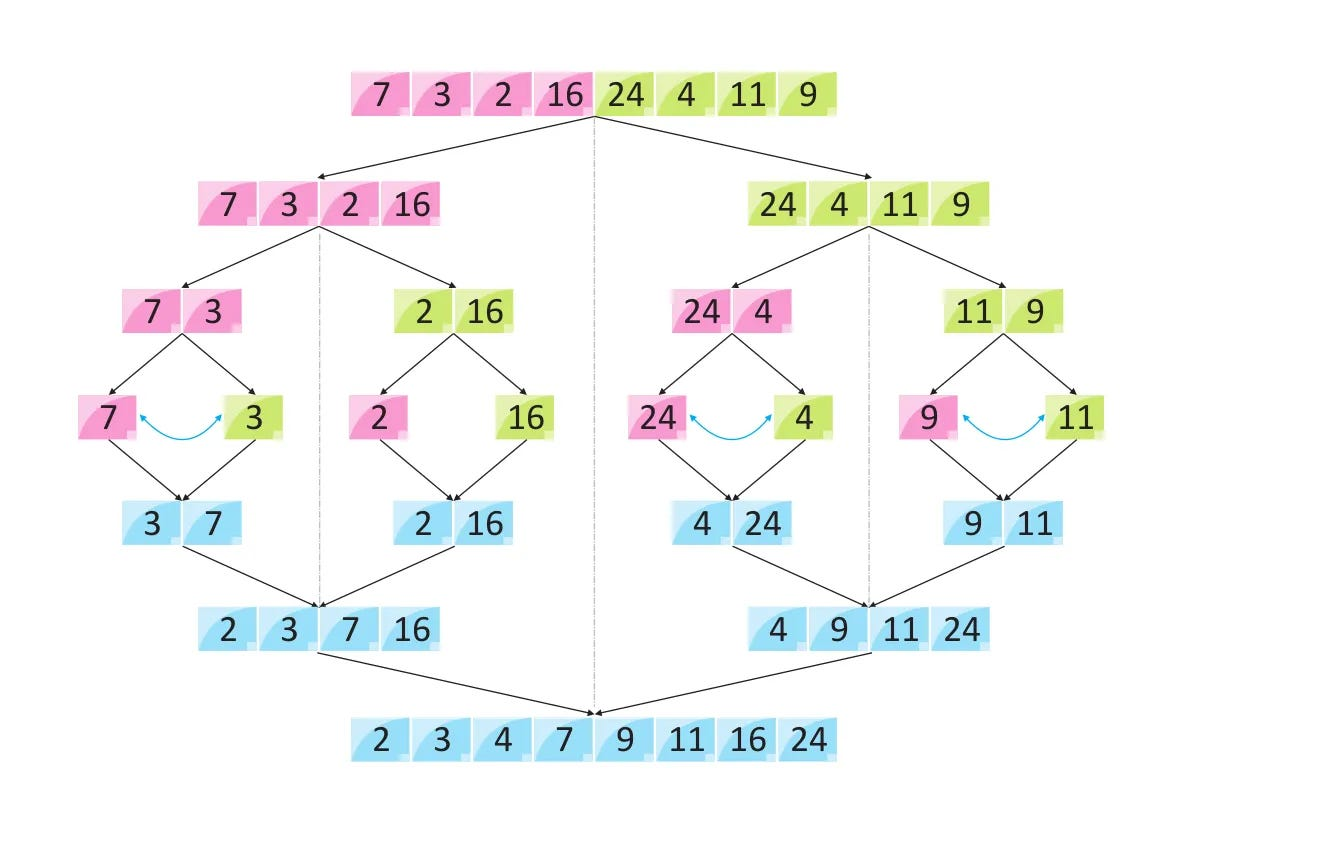

In [35]:
def executar_merge_sort(lista):
    if len(lista) <= 1:
        return lista
    else:
        meio = len(lista)//2
        esquerda = executar_merge_sort(lista[:meio])
        direita  = executar_merge_sort(lista[meio:])
        print(esquerda, direita)
        return executar_merge(esquerda, direita)

def executar_merge(esquerda, direita):
    sub_lista_ordenada=[]
    topo_esquerda = 0
    topo_direita = 0
    while topo_esquerda < len(esquerda) and topo_direita < len(direita):
        if esquerda[topo_esquerda] <= direita[topo_direita]:
            sub_lista_ordenada.append(esquerda[topo_esquerda])
            topo_esquerda += 1
        else:
            sub_lista_ordenada.append(direita[topo_direita])
            topo_direita += 1
        print("        ", sub_lista_ordenada)

    print("    ", sub_lista_ordenada, esquerda[topo_esquerda:], direita[topo_direita:])
    sub_lista_ordenada += esquerda[topo_esquerda:]
    sub_lista_ordenada += direita[topo_direita:]
    return sub_lista_ordenada


lista = [7, 3, 2, 16, 24, 4, 11, 9]

executar_merge_sort(lista)

[7] [3]
         [3]
     [3] [7] []
[2] [16]
         [2]
     [2] [] [16]
[3, 7] [2, 16]
         [2]
         [2, 3]
         [2, 3, 7]
     [2, 3, 7] [] [16]
[24] [4]
         [4]
     [4] [24] []
[11] [9]
         [9]
     [9] [11] []
[4, 24] [9, 11]
         [4]
         [4, 9]
         [4, 9, 11]
     [4, 9, 11] [24] []
[2, 3, 7, 16] [4, 9, 11, 24]
         [2]
         [2, 3]
         [2, 3, 4]
         [2, 3, 4, 7]
         [2, 3, 4, 7, 9]
         [2, 3, 4, 7, 9, 11]
         [2, 3, 4, 7, 9, 11, 16]
     [2, 3, 4, 7, 9, 11, 16] [] [24]


[2, 3, 4, 7, 9, 11, 16, 24]

---

## Quicksort (Ordenação Rápida)

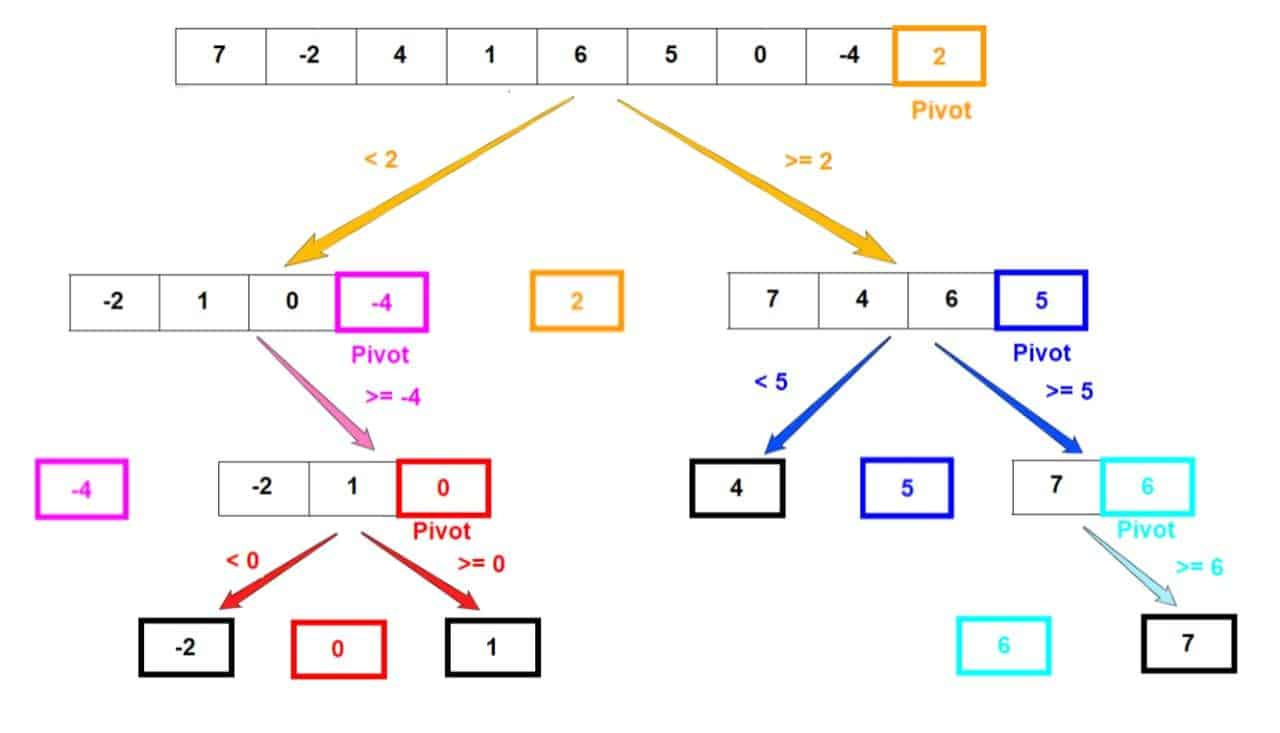

In [13]:
def executar_quicksort(lista, inicio, fim):
    if inicio < fim:
        pivo = executar_particao(lista, inicio, fim)
        executar_quicksort(lista, inicio, pivo - 1)
        executar_quicksort(lista, pivo + 1, fim)
    return lista


def executar_particao(lista, inicio, fim):
    pivo = lista[fim]
    esquerda = inicio
    for direita in range(inicio, fim):
        if lista[direita] <= pivo:
            lista[direita], lista[esquerda] = lista[esquerda], lista[direita]
            esquerda += 1
    lista[esquerda], lista[fim] = lista[fim], lista[esquerda]
    return esquerda


lista = [7, -2, 4, 1, 6, 5, 0, -4, 2]

executar_quicksort(lista, inicio=0, fim=len(lista)-1)

[-4, -2, 0, 1, 2, 4, 5, 6, 7]